In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import io, os, sys, types

In [3]:
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [4]:
def find_notebook(fullname='PA3_PreProcess_and_MakeFeatures', path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [5]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [6]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [7]:
sys.meta_path.append(NotebookFinder())

importing Jupyter notebook from PA3_PreProcess_and_MakeFeatures.ipynb
importing Jupyter notebook from PA3_ReadData_and_Explore.ipynb


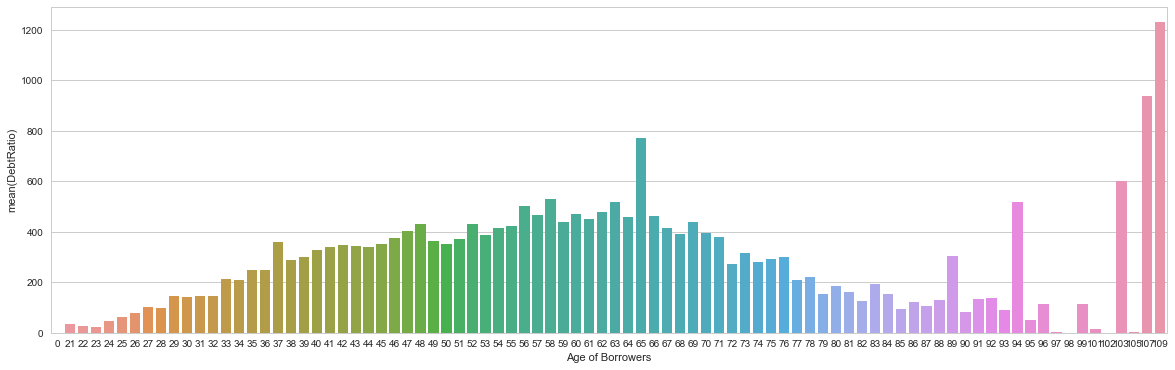

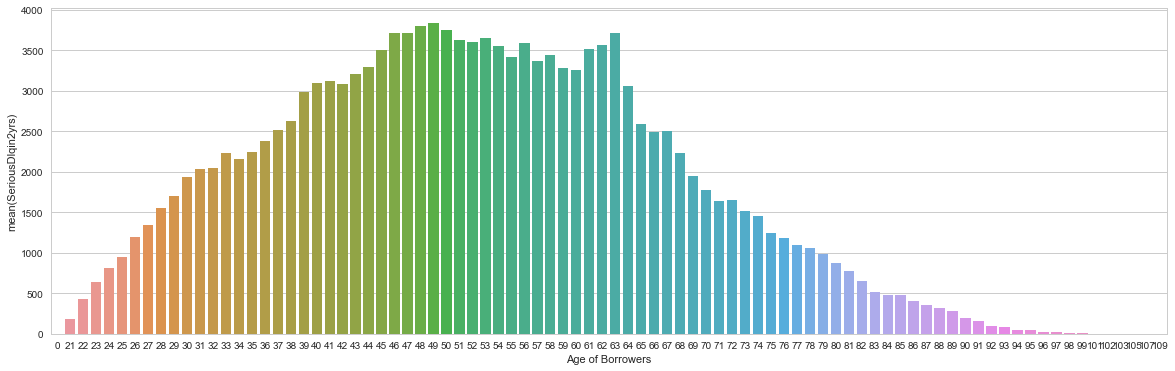

PA3_ReadData_and_Explore.ipynb:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  "cell_type": "code",


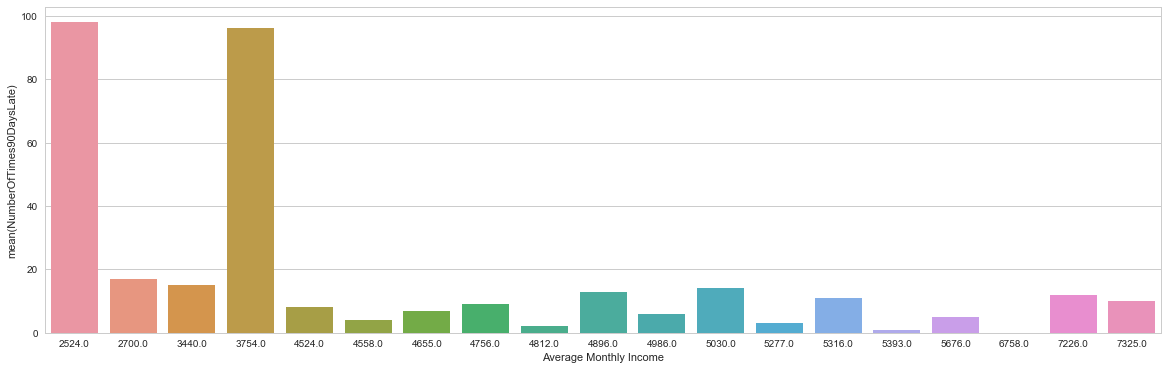

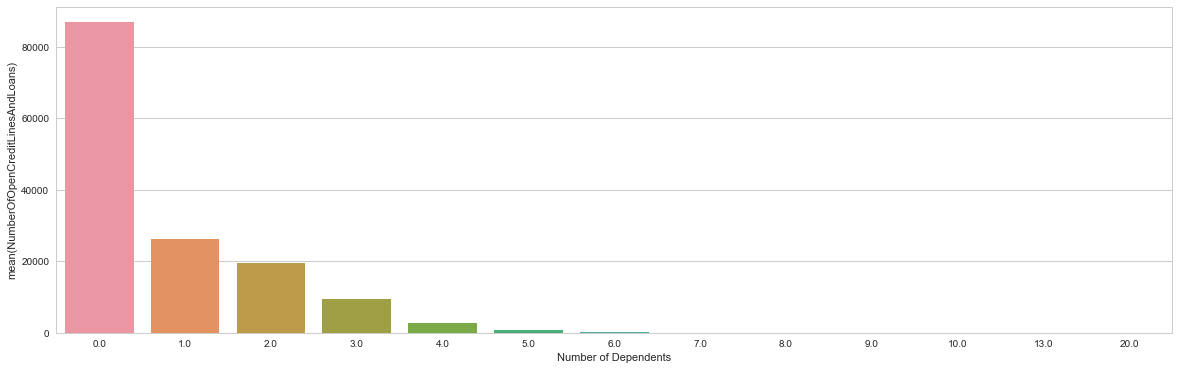

PA3_ReadData_and_Explore.ipynb:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  "metadata": {


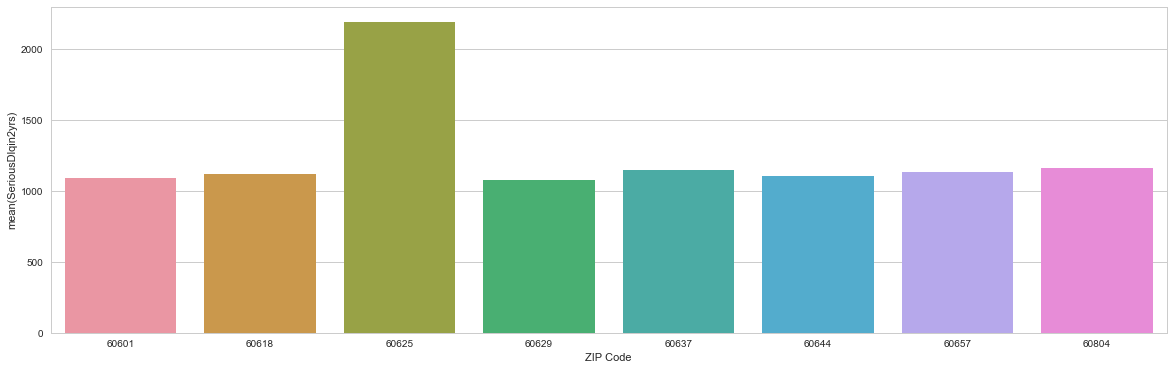

PA3_PreProcess_and_MakeFeatures.ipynb:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  "collapsed": true
PA3_PreProcess_and_MakeFeatures.ipynb:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  "execution_count": 1,


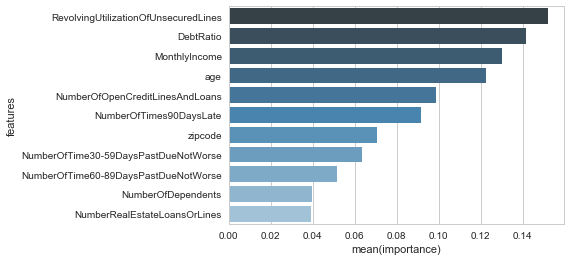

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha

In [8]:
import PA3_PreProcess_and_MakeFeatures

# Building various classifiers

we first split the data into the training set and the testing set

In [9]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
df_important_features = PA3_PreProcess_and_MakeFeatures.df_important_features
df = PA3_PreProcess_and_MakeFeatures.df

In [11]:
#user-defined test_size_ratio
def train_test_split_ratio(important_features, outcome_variable, test_size_ratio):
    return train_test_split(important_features, outcome_variable, test_size=test_size_ratio, random_state=42)

In [12]:
delinquincy_train, delinquincy_test, outcomes_train, outcomes_test = train_test_split_ratio(df_important_features, df.SeriousDlqin2yrs, 0.3)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [66]:
Decision_Tree = DecisionTreeClassifier()
Logistic_Regression = LogisticRegression()
Support_Vector_Machine = svm.SVC()
K_NearestNeighbors = KNeighborsClassifier(3)
Random_Forest_Classifier = RandomForestClassifier()
Gradient_Boosting_Classifier = GradientBoostingClassifier()
Bagging_Classifier = BaggingClassifier()

In [67]:
classifiers = [Decision_Tree, Logistic_Regression, K_NearestNeighbors, Random_Forest_Classifier, Gradient_Boosting_Classifier, Bagging_Classifier]

def classifier_fit(classifier, X_train, Y_train, X_output, Y_output):
    classifier.fit(X_train, Y_train)
    score = classifier.score(X_output, Y_output)
    return score
    

def model_classifiers(classifiers_names, X_train, Y_train, X_output, Y_output):
    score_classifiers_list = []
    for classifier in classifiers_names:
        score = classifier_fit(classifier, X_train, Y_train, X_output, Y_output)
        score_classifiers_list.append((classifier, score))
        
    return score_classifiers_list

In [ ]:
score_classifiers_list = model_classifiers(classifiers, delinquincy_train, outcomes_train, delinquincy_test, outcomes_test)

In [26]:
score_classifiers_list

NameError: name 'score_classifiers_list' is not defined

#tweaking the parameters to see changes in the output

In [68]:
new_params_classifier_list = []
def change_parameters(params, values, classifier):
    if type(params) == int:
        classifier.params = values
    elif type(params) == list:
        counter = 0
        for param in params:
            classifier.param = values[counter]
            counter += 1            
    score = classifier_fit(classifier, delinquincy_train, outcomes_train, delinquincy_test, outcomes_test)
    new_params_classifier_list.append((classifier, params, values, score))
    return new_params_classifier_list

In [70]:

def change_parameters(param1, values1, param2, values2, classifier):
    new_params_classifier_list = []

    for i in range(2):
        for value1 in values1:
            for value2 in values2:
                classifier.param1 = value1
                classifier.param2 = value2
                score = classifier_fit(classifier, delinquincy_train, outcomes_train, delinquincy_test, outcomes_test)
                new_params_classifier_list.append((classifier, param1, value1, param2, value2, score))

            break
    
    return new_params_classifier_list

changing parameters for KNearestNeighbors, Decision Trees and Logistic Regression. The rest are ensemble methods.

In [ ]:
# For KNearest Neighbors
n_neighbors_range = list(range(10))
p_distance_values = [1,2]
knearest_params_list = change_parameters('n_neighbors', n_neighbors_range, 'p', p_distance_values, K_NearestNeighbors)

In [ ]:
# For Decision Trees
max_features_range = ['auto', 'sqrt', 'log2']
min_samples_leaf_range = ['int', 'float']
decision_tree_params_list = change_parameters('max_features_range', max_features_range, 'min_samples_leaf', min_samples_leaf_range, K_NearestNeighbors)

In [ ]:
# For Logistic Regression
penalty_range = ['l1', 'l2']
C_values = list(range(0.0, 1.0, 0.1))
logistic_regression_params_list = change_parameters('penalty', penalty_range, 'C', C_values, Logistic_Regression)

In [ ]:
decision_tree_params_list = change_parameters('max_features_range', max_features_range, 'min_samples_leaf', min_samples_leaf_range, K_NearestNeighbors)